In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import psycopg2;                               import pandas as pd;             pd.options.display.max_columns = None;
import pandas.io.sql as sqlio;                 import unidecode;                import numpy as np;                      
import matplotlib.pyplot as plt;               import plotly;                   import plotly.graph_objs as go;
import re;                                     import seaborn as sns;           from scipy import stats;
import os;                                     import sys;                      from IPython.display import display;

import statsmodels.api as sm;                     from sklearn.linear_model import LinearRegression;
from sklearn import tree, linear_model, metrics;  from sklearn.model_selection import train_test_split;
import seaborn as sns;                            from sklearn.preprocessing import StandardScaler;
import tensorflow as tf;                          import warnings; warnings.filterwarnings("ignore")

from plotly.subplots import make_subplots
import plotly.offline as pyo;
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot;
from IPython.display import display, HTML; init_notebook_mode(connected=True);
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation;
from sklearn.mixture import GaussianMixture;  
%matplotlib inline

import string; import folium; from folium import plugins

pd.options.display.max_rows; pd.set_option('display.max_colwidth', -1); pd.options.display.max_rows = 5000

/home/marcelo.trindade/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



# Case Boticário - Cientista de Dados Sênior

## Questões propostas

Para o case proposto, o método para análise é livre, sendo que as principais informações que devem ser respondidas são:


1- existe correlação entre os fatores?

2- se removermos 1 fator, ainda há possibilidade de chegarmos a média final do Id?

3- existe algum fator que seja problemático ou todos os fatores estão com problemas?

4- qual a sua recomendação de ação com base nos dados dispostos?

## Lendo os dados

In [2]:
data = pd.read_excel('Case_CD.xlsx'); data.head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,X1,Grupo 4,5.0,7.5,5.0,10.0,5.0,10.0,NaN,NaN,NaN,NaN
1,X2,Grupo 4,7.5,10.0,7.5,10.0,7.5,10.0,NaN,NaN,NaN,NaN
2,X3,Grupo 4,7.5,10.0,7.5,10.0,7.5,10.0,NaN,NaN,NaN,NaN
3,X4,Grupo 4,7.5,10.0,10.0,10.0,7.5,10.0,NaN,NaN,NaN,NaN
4,X5,Grupo 3,7.5,10.0,5.0,10.0,7.5,10.0,7.5,7.5,7.5,7.5


In [3]:
data.describe()

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
count,3257.000000,3262.000000,3253.000000,3272.000000,3268.000000,3157.000000,401.000000,399.000000,402.000000,402.000000
mean,7.433221,8.052575,6.719182,8.253362,7.069308,8.005226,7.450125,7.669173,7.779851,7.033582
std,1.605401,1.682862,1.597991,1.646538,1.481965,1.648987,1.530116,1.732653,1.355939,1.632583
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,7.500000,7.500000,5.000000,7.500000,5.000000,7.500000,7.500000,7.500000,7.500000,5.000000
50%,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000
75%,7.500000,10.000000,7.500000,10.000000,7.500000,10.000000,7.500000,10.000000,7.500000,7.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Verificando os tipos distintos de grupos

In [4]:
groups = list(set(data['Grupo de controle'])); groups

['Grupo 3', 'Grupo 4', 'Grupo 2', 'Grupo 1']

In [5]:
dic = {}
for group in groups:
    dic[group] = data[data['Grupo de controle'] == group]

In [6]:
col = data.columns[2:]
for i in range(4):
    print('Tamanho da amostra '+str(i+1)+': '+str(len(dic['Grupo '+str(i+1)])))

Tamanho da amostra 1: 29
Tamanho da amostra 2: 112
Tamanho da amostra 3: 308
Tamanho da amostra 4: 2849


In [7]:
dic['Grupo 1'].head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
36,X37,Grupo 1,7.5,7.5,7.5,10.0,7.5,NaN,7.5,7.5,7.5,7.5
50,X51,Grupo 1,5.0,10.0,7.5,10.0,7.5,NaN,7.5,10.0,10.0,7.5
160,X161,Grupo 1,10.0,7.5,7.5,10.0,7.5,NaN,10.0,7.5,7.5,7.5
330,X331,Grupo 1,10.0,5.0,7.5,7.5,10.0,NaN,10.0,7.5,10.0,7.5
428,X429,Grupo 1,10.0,7.5,7.5,10.0,10.0,NaN,7.5,10.0,10.0,7.5


In [8]:
dic['Grupo 2'].head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
17,X18,Grupo 2,7.5,7.5,7.5,7.5,5.0,NaN,10.0,10.0,7.5,7.5
31,X32,Grupo 2,7.5,7.5,5.0,10.0,7.5,NaN,7.5,10.0,7.5,7.5
42,X43,Grupo 2,7.5,7.5,7.5,10.0,7.5,NaN,7.5,7.5,7.5,7.5
43,X44,Grupo 2,7.5,7.5,7.5,10.0,7.5,NaN,10.0,7.5,5.0,10.0
49,X50,Grupo 2,7.5,10.0,7.5,10.0,7.5,NaN,7.5,5.0,10.0,7.5


In [9]:
dic['Grupo 3'].head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
4,X5,Grupo 3,7.5,10.0,5.0,10.0,7.5,10.0,7.5,7.5,7.5,7.5
10,X11,Grupo 3,7.5,10.0,7.5,10.0,5.0,10.0,10.0,5.0,7.5,10.0
15,X16,Grupo 3,7.5,7.5,5.0,10.0,5.0,7.5,7.5,7.5,7.5,5.0
19,X20,Grupo 3,7.5,10.0,7.5,10.0,7.5,10.0,10.0,10.0,10.0,7.5
22,X23,Grupo 3,7.5,7.5,10.0,10.0,7.5,10.0,7.5,5.0,10.0,5.0


In [10]:
dic['Grupo 4'].head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,X1,Grupo 4,5.0,7.5,5.0,10.0,5.0,10.0,NaN,NaN,NaN,NaN
1,X2,Grupo 4,7.5,10.0,7.5,10.0,7.5,10.0,NaN,NaN,NaN,NaN
2,X3,Grupo 4,7.5,10.0,7.5,10.0,7.5,10.0,NaN,NaN,NaN,NaN
3,X4,Grupo 4,7.5,10.0,10.0,10.0,7.5,10.0,NaN,NaN,NaN,NaN
5,X6,Grupo 4,5.0,5.0,5.0,10.0,7.5,10.0,NaN,NaN,NaN,NaN


## (3) Verificando fatores com problemas

In [11]:
d1 = pd.DataFrame(dic['Grupo 1'].isnull().sum(axis = 0)/len(dic['Grupo 1'])); d1.T

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,0.0,0.0,0.034483,0.034483,0.034483,0.034483,0.034483,1.0,0.034483,0.034483,0.034483,0.034483


In [12]:
d2 = pd.DataFrame(dic['Grupo 2'].isnull().sum(axis = 0)/len(dic['Grupo 2'])); d2.T

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,0.0,0.0,0.008929,0.008929,0.008929,0.008929,0.008929,0.866071,0.008929,0.026786,0.008929,0.008929


In [13]:
d3 = pd.DataFrame(dic['Grupo 3'].isnull().sum(axis = 0)/len(dic['Grupo 3'])); d3.T

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,0.0,0.0,0.006494,0.003247,0.003247,0.0,0.0,0.0,0.149351,0.149351,0.146104,0.146104


In [14]:
d4 = pd.DataFrame(dic['Grupo 4'].isnull().sum(axis = 0)/len(dic['Grupo 4'])); d4.T

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,0.0,0.0,0.012987,0.011583,0.014742,0.008424,0.009828,0.005265,1.0,1.0,1.0,1.0


### Conclusão:
- No grupo 1: O Fator 6 é completamente nulo

- No grupo 2: O Fator 6 tem 86% de dados faltando
 
- No grupo 3: Falta 15% de de informações nos Fatores 7 8 9 e 10
 
- No grupo 4: Os Fatores 7 8 9 e 10 são completamente nulos
 

## Montando uma tabela de frequências para dados discretos

In [15]:
# Verificando se os dados são realmente discretos e quais são.
for i in range(10):
    print('Valores disstintos no Fator '+str(i+1)+': '+\
    str(set(data[~data['Fator '+str(i+1)].isnull()]['Fator '+str(i+1)])))

Valores disstintos no Fator 1: {10.0, 5.0, 7.5}
Valores disstintos no Fator 2: {10.0, 5.0, 7.5}
Valores disstintos no Fator 3: {10.0, 5.0, 7.5}
Valores disstintos no Fator 4: {10.0, 5.0, 7.5}
Valores disstintos no Fator 5: {10.0, 5.0, 7.5}
Valores disstintos no Fator 6: {10.0, 5.0, 7.5}
Valores disstintos no Fator 7: {10.0, 5.0, 7.5}
Valores disstintos no Fator 8: {10.0, 5.0, 7.5}
Valores disstintos no Fator 9: {10.0, 5.0, 7.5}
Valores disstintos no Fator 10: {10.0, 5.0, 7.5}


In [16]:
FREQ = {}
for g in range(4):
    freq = pd.DataFrame([10.0, 7.5, 5.0]); freq.columns = ['Valor']; freq.set_index('Valor', inplace = True)
    for c in list(col):
        try:
            df = dic['Grupo '+str(g+1)][[c]]
            GR1 = pd.DataFrame(df.groupby( \
                  df.columns.tolist(),as_index=False).size().reset_index().\
                  rename(columns={0:'#'+c}))
            GR1.sort_values(c, ascending = False, inplace = True)
            GR1.columns = ['Valor', '#'+c]; GR1.set_index('Valor', inplace = True);
            freq = freq.merge(GR1, left_on='Valor', right_on='Valor')
        except:
            pass
    FREQ['Grupo '+str(g+1)] = freq

### Distribuição de frequências (absoluto)

In [17]:
FREQ['Grupo 1']

,#Fator 1,#Fator 2,#Fator 3,#Fator 4,#Fator 5,#Fator 6,#Fator 7,#Fator 8,#Fator 9,#Fator 10
Valor,,,,,,,,,,


In [18]:
FREQ['Grupo 2']

,#Fator 1,#Fator 2,#Fator 3,#Fator 4,#Fator 5,#Fator 6,#Fator 7,#Fator 8,#Fator 9,#Fator 10
Valor,,,,,,,,,,
10.0,24,50,21,67,31,10,26,33,26,23
7.5,71,51,63,42,56,4,65,55,75,63
5.0,16,10,27,2,24,1,20,21,10,25


In [19]:
FREQ['Grupo 3']

,#Fator 1,#Fator 2,#Fator 3,#Fator 4,#Fator 5,#Fator 6,#Fator 7,#Fator 8,#Fator 9,#Fator 10
Valor,,,,,,,,,,
10.0,75,135,42,190,45,149,33,67,51,23
7.5,193,154,175,107,208,145,172,136,186,137
5.0,38,18,90,11,55,14,57,59,26,103


In [20]:
FREQ['Grupo 4']

,#Fator 1,#Fator 2,#Fator 3,#Fator 4,#Fator 5,#Fator 6,#Fator 7,#Fator 8,#Fator 9,#Fator 10
Valor,,,,,,,,,,


### Distribuição de frequências (percentual)

In [21]:
(FREQ['Grupo 1']/len(dic['Grupo 1'])*100).round(decimals = 2).astype(str)+'%'

,#Fator 1,#Fator 2,#Fator 3,#Fator 4,#Fator 5,#Fator 6,#Fator 7,#Fator 8,#Fator 9,#Fator 10
Valor,,,,,,,,,,


In [22]:
(FREQ['Grupo 2']/len(dic['Grupo 2'])*100).round(decimals = 2).astype(str)+'%'

,#Fator 1,#Fator 2,#Fator 3,#Fator 4,#Fator 5,#Fator 6,#Fator 7,#Fator 8,#Fator 9,#Fator 10
Valor,,,,,,,,,,
10.0,21.43%,44.64%,18.75%,59.82%,27.68%,8.93%,23.21%,29.46%,23.21%,20.54%
7.5,63.39%,45.54%,56.25%,37.5%,50.0%,3.57%,58.04%,49.11%,66.96%,56.25%
5.0,14.29%,8.93%,24.11%,1.79%,21.43%,0.89%,17.86%,18.75%,8.93%,22.32%


In [23]:
(FREQ['Grupo 3']/len(dic['Grupo 3'])*100).round(decimals = 2).astype(str)+'%'

,#Fator 1,#Fator 2,#Fator 3,#Fator 4,#Fator 5,#Fator 6,#Fator 7,#Fator 8,#Fator 9,#Fator 10
Valor,,,,,,,,,,
10.0,24.35%,43.83%,13.64%,61.69%,14.61%,48.38%,10.71%,21.75%,16.56%,7.47%
7.5,62.66%,50.0%,56.82%,34.74%,67.53%,47.08%,55.84%,44.16%,60.39%,44.48%
5.0,12.34%,5.84%,29.22%,3.57%,17.86%,4.55%,18.51%,19.16%,8.44%,33.44%


In [24]:
(FREQ['Grupo 4']/len(dic['Grupo 4'])*100).round(decimals = 2).astype(str)+'%'

,#Fator 1,#Fator 2,#Fator 3,#Fator 4,#Fator 5,#Fator 6,#Fator 7,#Fator 8,#Fator 9,#Fator 10
Valor,,,,,,,,,,


ValueError: zero-size array to reduction operation minimum which has no identity

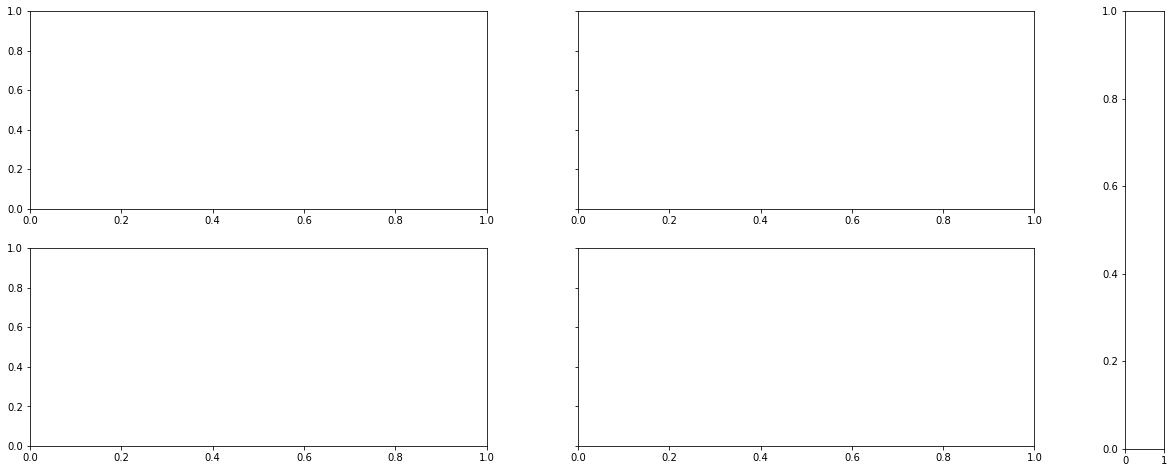

In [25]:
plt.cla(); plt.close()
fig, axs = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(18,8))
cbar_ax = fig.add_axes([0.97,.12,.03,.76])
sns.heatmap((FREQ['Grupo 1']/len(dic['Grupo 1'])*100).round(decimals = 2),ax=axs[0,0],fmt='.2f',cmap='PiYG',cbar_ax = cbar_ax, annot=True)
sns.heatmap((FREQ['Grupo 2']/len(dic['Grupo 2'])*100).round(decimals = 2),ax=axs[0,1],fmt='.2f',cmap='PiYG',cbar_ax = cbar_ax, annot=True)
sns.heatmap((FREQ['Grupo 3']/len(dic['Grupo 3'])*100).round(decimals = 2),ax=axs[1,0],fmt='.2f',cmap='PiYG',cbar_ax = cbar_ax, annot=True)
sns.heatmap((FREQ['Grupo 4']/len(dic['Grupo 4'])*100).round(decimals = 2),ax=axs[1,1],fmt='.2f',cmap='PiYG',cbar_ax = cbar_ax, annot=True)
axs[0,0].set_title('Grupo 1') 
axs[0,1].set_title('Grupo 2')
axs[1,0].set_title('Grupo 3') 
axs[1,1].set_title('Grupo 4')
fig.suptitle('Porcentagem dos valores dos fatores dos 4 grupos de controle',fontsize=20)
plt.show()

### Conclusões:
- Averiguar o motivo dos Fatores 3 e 10 terem numerosa parcela de potuação 5.0
- De forma geral, o fator 4 parece se destacar, e numerosa paracela pontua como 10.0

## (2) Ver se removendo fatores, há possibilidade de obter a média do Id

In [26]:
dictmp = {}
for group in groups:
    dictmp[group] = data[data['Grupo de controle'] == group]

for g in [1,2,3,4]:
    ind = [1,2,3,4,5,6,7,8,9,10]
    media_grupo = dictmp['Grupo '+str(g)][['Fator '+str(i) for i in ind]].mean(axis = 1)
    for exe in range(10):
        ind = [1,2,3,4,5,6,7,8,9,10]
        del(ind[exe])
        media_com_remocao = dictmp['Grupo '+str(g)][['Fator '+str(i) for i in ind]].mean(axis = 1)
        r = (media_com_remocao - media_grupo).abs().sum()
        if r == 0:
            print('O Fator '+str(exe+1)+' pode ser removido sem prejuízo de alterar a média no grupo '+str(g)+'.')

O Fator 6 pode ser removido sem prejuízo de alterar a média no grupo 1.
O Fator 7 pode ser removido sem prejuízo de alterar a média no grupo 4.
O Fator 8 pode ser removido sem prejuízo de alterar a média no grupo 4.
O Fator 9 pode ser removido sem prejuízo de alterar a média no grupo 4.
O Fator 10 pode ser removido sem prejuízo de alterar a média no grupo 4.


### Conclusão:
- No grupo 1: O Fator 6 pode ser removido sem prejuízo de alterar a média no grupo

- No grupo 4: Os Fatores 7 8 9 e 10 podem ser removidos sem projuízo de alterar a média no grupo


## Verificando a média dos fatores por grupo

In [27]:
d1 = pd.DataFrame(dic['Grupo 1'].mean(axis = 0)); d1.T

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,8.214286,7.321429,7.678571,9.196429,8.125,NaN,8.392857,8.125,7.857143,8.125


In [28]:
d2 = pd.DataFrame(dic['Grupo 2'].mean(axis = 0)); d2.T

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,7.68018,8.400901,7.364865,8.963964,7.657658,9.0,7.635135,7.775229,7.86036,7.454955


In [29]:
d3 = pd.DataFrame(dic['Grupo 3'].mean(axis = 0)); d3.T

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,7.802288,8.452769,7.109121,8.952922,7.418831,8.595779,7.270992,7.576336,7.737643,6.739544


In [30]:
d4 = pd.DataFrame(dic['Grupo 4'].mean(axis = 0)); d4.T

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
0,7.375533,8.002486,6.641432,8.139823,6.997519,7.93578,NaN,NaN,NaN,NaN


In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d1.index, y=d1[0], name="Grupo 1"))
fig.add_trace(go.Scatter(x=d2.index, y=d2[0], name="Grupo 2"))
fig.add_trace(go.Scatter(x=d3.index, y=d3[0], name="Grupo 3"))
fig.add_trace(go.Scatter(x=d4.index, y=d4[0], name="Grupo 4"))
# Add figure title
fig.update_layout(title_text="Médias dos Fatores")
# Set x-axis title
fig.update_xaxes(title_text="Fatores")
# Set y-axes titles
fig.update_yaxes(title_text="Médias dos Fatores")
fig.update_yaxes(title_text="Médias")

iplot(fig)

### Pontos observados:
- Há um comportamento similar entre a tendência das médias dos fatores nos grupos;
- O grupo 1 aperanta fugir do padrão no fator 2 e no fator 9 mas este fato pode ser justificado pelo número da amostra ser pequeno em relação aos demais;
- Os fatores 3 e 10 aparentam ter score mais baixo e o fator 4 e 6 um score mais alto.

## (1) Verificando se há correlação entre os fatores

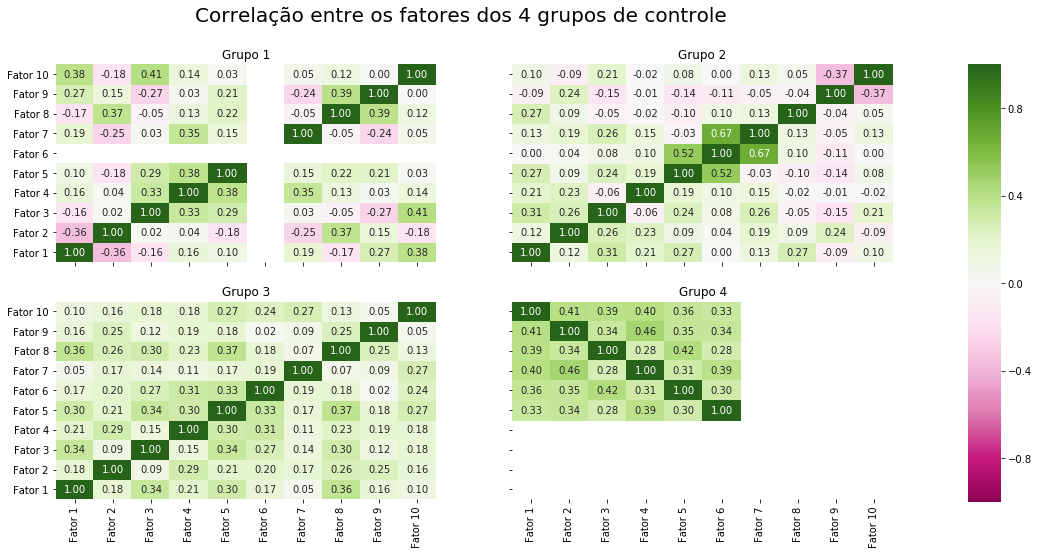

In [32]:
plt.cla(); plt.close()
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,8))
cbar_ax = fig.add_axes([0.97,.12,.03,.76])
sns.heatmap(dic['Grupo 1'][col].corr(),ax=axs[0,0],fmt='.2f',cmap='PiYG',vmin=-1,vmax=1,cbar_ax = cbar_ax, annot=True)
sns.heatmap(dic['Grupo 2'][col].corr(),ax=axs[0,1],fmt='.2f',cmap='PiYG',vmin=-1,vmax=1,cbar_ax = cbar_ax, annot=True)
sns.heatmap(dic['Grupo 3'][col].corr(),ax=axs[1,0],fmt='.2f',cmap='PiYG',vmin=-1,vmax=1,cbar_ax = cbar_ax, annot=True)
sns.heatmap(dic['Grupo 4'][col].corr(),ax=axs[1,1],fmt='.2f',cmap='PiYG',vmin=-1,vmax=1,cbar_ax = cbar_ax, annot=True)
axs[0,0].set_title('Grupo 1'); axs[0,1].set_title('Grupo 2')
axs[1,0].set_title('Grupo 3'); axs[1,1].set_title('Grupo 4')
fig.suptitle('Correlação entre os fatores dos 4 grupos de controle',fontsize=20)
plt.show()

###  Conclusão
- Os Fatores estão, de forma geral, muito pouco correlacionados

## Concentração de Fatores dois a dois

In [33]:
fig = make_subplots(rows=10, cols=10)
for i in range(10):
    for j in range(10):
        try:
            GR_TP = pd.DataFrame(dic['Grupo 1'][['Fator '+str(i+1), 'Fator '+str(j+1)]].groupby( \
            dic['Grupo 1'][['Fator '+str(i+1), 'Fator '+str(j+1)]].columns.tolist(),as_index=False).size().reset_index().\
            rename(columns={0:'Sum'}))
            
            fig.add_trace(go.Scatter(x=GR_TP['Fator '+str(i+1)],y=GR_TP['Fator '+str(j+1)],mode='markers',
                text=(GR_TP['Sum'].astype(str))+' = '+(GR_TP['Sum']/len(dic['Grupo 1'])*100).round(decimals = 2).astype(str)+'%',
                marker=dict(size=GR_TP['Sum']*2, 
                color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                name= 'F'+str(i+1)+' vs '+'F'+str(j+1)),
                row=i+1, col=j+1)
            fig.update_xaxes(tickvals=[5, 7.5, 10])
            fig.update_yaxes(tickvals=[5, 7.5, 10])
        except:
            pass
fig.update_layout(
    height=1000, width=1000, 
    title_text="Comparação de concentração nos Fatores dois a dois (Grupo 1)")
iplot(fig)

In [34]:
fig = make_subplots(rows=10, cols=10)
for i in range(10):
    for j in range(10):
        try:
            GR_TP = pd.DataFrame(dic['Grupo 2'][['Fator '+str(i+1), 'Fator '+str(j+1)]].groupby( \
            dic['Grupo 2'][['Fator '+str(i+1), 'Fator '+str(j+1)]].columns.tolist(),as_index=False).size().reset_index().\
            rename(columns={0:'Sum'}))

            fig.add_trace(go.Scatter(x=GR_TP['Fator '+str(i+1)],y=GR_TP['Fator '+str(j+1)],mode='markers',
                text=(GR_TP['Sum'].astype(str))+' = '+(GR_TP['Sum']/len(dic['Grupo 2'])*100).round(decimals = 2).astype(str)+'%',
                marker=dict(size=GR_TP['Sum']/2, 
                color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                name= 'F'+str(i+1)+' vs '+'F'+str(j+1)),
                row=i+1, col=j+1)
            fig.update_xaxes(tickvals=[5, 7.5, 10])
            fig.update_yaxes(tickvals=[5, 7.5, 10])
        except:
            pass
fig.update_layout(
    height=1000, width=1000, 
    title_text="Comparação de concentração nos Fatores dois a dois (Grupo 2)")
iplot(fig)

In [35]:
fig = make_subplots(rows=10, cols=10)
for i in range(10):
    for j in range(10):
        try:
            GR_TP = pd.DataFrame(dic['Grupo 3'][['Fator '+str(i+1), 'Fator '+str(j+1)]].groupby( \
            dic['Grupo 3'][['Fator '+str(i+1), 'Fator '+str(j+1)]].columns.tolist(),as_index=False).size().reset_index().\
            rename(columns={0:'Sum'}))

            fig.add_trace(go.Scatter(x=GR_TP['Fator '+str(i+1)],y=GR_TP['Fator '+str(j+1)],mode='markers',
                text=(GR_TP['Sum'].astype(str))+' = '+(GR_TP['Sum']/len(dic['Grupo 3'])*100).round(decimals = 2).astype(str)+'%',
                marker=dict(size=GR_TP['Sum']/5, 
                color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                name= 'F'+str(i+1)+' vs '+'F'+str(j+1)),
                row=i+1, col=j+1)
            fig.update_xaxes(tickvals=[5, 7.5, 10])
            fig.update_yaxes(tickvals=[5, 7.5, 10])
        except:
            pass
fig.update_layout(
    height=1000, width=1000, 
    title_text="Comparação de concentração nos Fatores dois a dois (Grupo 3)")
iplot(fig)

In [36]:
fig = make_subplots(rows=6, cols=6)
for i in range(6):
    for j in range(6):
        try:
            GR_TP = pd.DataFrame(dic['Grupo 4'][['Fator '+str(i+1), 'Fator '+str(j+1)]].groupby( \
            dic['Grupo 4'][['Fator '+str(i+1), 'Fator '+str(j+1)]].columns.tolist(),as_index=False).size().reset_index().\
            rename(columns={0:'Sum'}))

            fig.add_trace(go.Scatter(x=GR_TP['Fator '+str(i+1)],y=GR_TP['Fator '+str(j+1)],mode='markers',
                text=(GR_TP['Sum'].astype(str))+' = '+(GR_TP['Sum']/len(dic['Grupo 4'])*100).round(decimals = 2).astype(str)+'%',
                marker=dict(size=GR_TP['Sum']/20, 
                color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                name= 'F'+str(i+1)+' vs '+'F'+str(j+1)),
                row=i+1, col=j+1)
            fig.update_xaxes(tickvals=[5, 7.5, 10])
            fig.update_yaxes(tickvals=[5, 7.5, 10])
        except:
            pass
fig.update_layout(
    height=1000, width=1000, 
    title_text="Comparação de concentração nos Fatores dois a dois (Grupo 4)")
iplot(fig)

## (4) Recomendaçãode ação nos dados

In [37]:
dic['Grupo 4'][dic['Grupo 4'].duplicated(subset = col)].head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
2,X3,Grupo 4,7.5,10.0,7.5,10.0,7.5,10.0,NaN,NaN,NaN,NaN
7,X8,Grupo 4,7.5,10.0,7.5,10.0,7.5,10.0,NaN,NaN,NaN,NaN
14,X15,Grupo 4,7.5,10.0,7.5,10.0,7.5,10.0,NaN,NaN,NaN,NaN
27,X28,Grupo 4,7.5,10.0,10.0,10.0,7.5,10.0,NaN,NaN,NaN,NaN
28,X29,Grupo 4,7.5,10.0,7.5,10.0,7.5,10.0,NaN,NaN,NaN,NaN


In [38]:
dic['Grupo 4'].sort_values(list(col), ascending = False).head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10
456,X457,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN
483,X484,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN
629,X630,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN
651,X652,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN
907,X908,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN


In [39]:
dic['Grupo 1']['Media'] = dic['Grupo 1'][list(col)].mean(axis = 1)
dic['Grupo 1'].sort_values(['Media']+list(col), ascending = True)
dic['Grupo 2']['Media'] = dic['Grupo 2'][list(col)].mean(axis = 1)
dic['Grupo 2'].sort_values(['Media']+list(col), ascending = True)
dic['Grupo 3']['Media'] = dic['Grupo 3'][list(col)].mean(axis = 1)
dic['Grupo 3'].sort_values(['Media']+list(col), ascending = True)
dic['Grupo 4']['Media'] = dic['Grupo 4'][list(col)].mean(axis = 1)
dic['Grupo 4'].sort_values(['Media']+list(col), ascending = False).head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10,Media
456,X457,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,10.0
483,X484,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,10.0
629,X630,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,10.0
651,X652,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,10.0
907,X908,Grupo 4,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,10.0


In [40]:
x_data = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4']
y0 = dic['Grupo 1']['Media'];y1 = dic['Grupo 2']['Media']
y2 = dic['Grupo 3']['Media'];y3 = dic['Grupo 4']['Media']
y_data = [y0, y1, y2, y3]
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(y=yd, name=xd, boxpoints='all',
            jitter=0.5, whiskerwidth=0.2,fillcolor=cls, marker_size=2,line_width=1))

fig.update_layout(
    title='Grupos diagramas',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=True
)

iplot(fig)

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, 1+len(dic['Grupo 1']['Media']), dtype=int)/len(dic['Grupo 1']['Media']), \
                         y=dic['Grupo 1']['Media'].sort_values(ascending = True), name="Grupo 1"))
fig.add_trace(go.Scatter(x=np.arange(1, 1+len(dic['Grupo 2']['Media']), dtype=int)/len(dic['Grupo 2']['Media']), \
                         y=dic['Grupo 2']['Media'].sort_values(ascending = True), name="Grupo 2"))
fig.add_trace(go.Scatter(x=np.arange(1, 1+len(dic['Grupo 3']['Media']), dtype=int)/len(dic['Grupo 3']['Media']), \
                         y=dic['Grupo 3']['Media'].sort_values(ascending = True), name="Grupo 3"))
fig.add_trace(go.Scatter(x=np.arange(1, 1+len(dic['Grupo 4']['Media']), dtype=int)/len(dic['Grupo 4']['Media']), \
                         y=dic['Grupo 4']['Media'].sort_values(ascending = True), name="Grupo 4"))
# Add figure title
fig.update_layout(title_text="Médias dos Ids")
# Set x-axis title
fig.update_xaxes(title_text="Ids")
# Set y-axes titles
fig.update_yaxes(title_text="Médias dos Ids")
fig.update_yaxes(title_text="Médias dos Ids")

iplot(fig)

In [42]:
dic['Grupo 1'].describe()

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10,Media
count,28.000000,28.000000,28.000000,28.000000,28.000000,0.0,28.000000,28.000000,28.000000,28.000000,28.000000
mean,8.214286,7.321429,7.678571,9.196429,8.125000,NaN,8.392857,8.125000,7.857143,8.125000,8.115079
std,1.646706,1.348623,1.348623,1.369910,1.463285,NaN,1.553712,1.613743,1.477342,1.463285,0.638630
min,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,5.000000,5.000000,5.000000,6.388889
25%,7.500000,7.500000,7.500000,7.500000,7.500000,NaN,7.500000,7.500000,7.500000,7.500000,7.777778
50%,7.500000,7.500000,7.500000,10.000000,7.500000,NaN,7.500000,7.500000,7.500000,7.500000,8.333333
75%,10.000000,7.500000,7.500000,10.000000,10.000000,NaN,10.000000,10.000000,8.125000,10.000000,8.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,10.000000,10.000000,10.000000,10.000000,9.166667


In [43]:
dic['Grupo 2'].describe()

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10,Media
count,111.000000,111.000000,111.000000,111.000000,111.000000,15.000000,111.000000,109.000000,111.000000,111.000000,111.000000
mean,7.680180,8.400901,7.364865,8.963964,7.657658,9.000000,7.635135,7.775229,7.860360,7.454955,7.877002
std,1.496652,1.609376,1.645857,1.325813,1.760658,1.581139,1.610965,1.746009,1.383624,1.650826,0.681062
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.833333
25%,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000
50%,7.500000,7.500000,7.500000,10.000000,7.500000,10.000000,7.500000,7.500000,7.500000,7.500000,7.777778
75%,7.500000,10.000000,7.500000,10.000000,10.000000,10.000000,7.500000,10.000000,7.500000,7.500000,8.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.444444


In [44]:
dic['Grupo 3'].describe()

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10,Media
count,306.000000,307.000000,307.000000,308.000000,308.000000,308.000000,262.000000,262.000000,263.000000,263.000000,308.000000
mean,7.802288,8.452769,7.109121,8.952922,7.418831,8.595779,7.270992,7.576336,7.737643,6.739544,7.834010
std,1.491273,1.488041,1.594614,1.405048,1.424507,1.453878,1.450009,1.735336,1.334220,1.557313,0.838150
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,7.500000,7.500000,5.000000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,5.000000,7.250000
50%,7.500000,7.500000,7.500000,10.000000,7.500000,7.500000,7.500000,7.500000,7.500000,7.500000,7.916667
75%,7.500000,10.000000,7.500000,10.000000,7.500000,10.000000,7.500000,10.000000,7.500000,7.500000,8.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.583333


In [45]:
dic['Grupo 4'].describe()

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10,Media
count,2812.000000,2816.000000,2807.000000,2825.000000,2821.000000,2834.00000,0.0,0.0,0.0,0.0,2843.000000
mean,7.375533,8.002486,6.641432,8.139823,6.997519,7.93578,NaN,NaN,NaN,NaN,7.500147
std,1.613591,1.700379,1.584331,1.656579,1.462472,1.65523,NaN,NaN,NaN,NaN,1.115679
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,NaN,NaN,NaN,NaN,5.000000
25%,7.500000,7.500000,5.000000,7.500000,5.000000,7.50000,NaN,NaN,NaN,NaN,6.666667
50%,7.500000,7.500000,7.500000,7.500000,7.500000,7.50000,NaN,NaN,NaN,NaN,7.500000
75%,7.500000,10.000000,7.500000,10.000000,7.500000,10.00000,NaN,NaN,NaN,NaN,8.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,NaN,NaN,NaN,NaN,10.000000


In [46]:
for g2 in range(4):
    for g1 in range(g2+1):
        if g2 != g1:
            try:
                A = dic['Grupo '+str(g1+1)][['Media']].fillna(7.5)
                B = dic['Grupo '+str(g2+1)][['Media']].fillna(7.5)
                
                #Pelas bibliotecas python:
                #t, p = sm.stats.ztest(A, B, alternative = 'two-sided')
                #if abs(min(p)) < 0.01/2:
                #    r = 'Há diferença entre as médias (Rej H0)'
                #else:
                #    r = 'Não há diferença entre as médias (Não Rej H0)'
                #print(str(g1+1)+' e '+str(g2+1)+': '+r)
                
                #Pela teoria:
                t = stats.t.ppf(1-0.01/2,len(A)+len(B)-2)
                s2 = ((len(A)-1)*A.var()+(len(B)-1)*B.var())/(len(A)+len(B)-2)
                Tobs = (A.mean()-B.mean())/(np.sqrt(s2*(1/len(A)+1/len(B))))
                if abs(Tobs.values[0]) > t:
                    r = 'Há diferença entre as médias (Rej H0)'
                else:
                    r = 'Não há diferença entre as médias (Não Rej H0)'
                print(str(g1+1)+' e '+str(g2+1)+': '+r)
            except:
                pass

1 e 2: Não há diferença entre as médias (Não Rej H0)
1 e 3: Não há diferença entre as médias (Não Rej H0)
2 e 3: Não há diferença entre as médias (Não Rej H0)
1 e 4: Há diferença entre as médias (Rej H0)
2 e 4: Há diferença entre as médias (Rej H0)
3 e 4: Há diferença entre as médias (Rej H0)


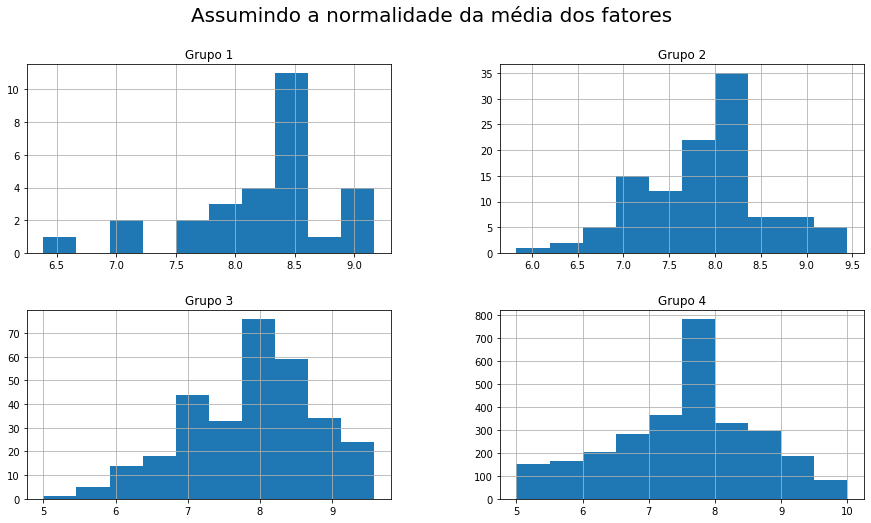

In [47]:
plt.cla(); plt.close()
fig, axs = plt.subplots(2, 2, figsize=(15,8))
dic['Grupo 1'][['Media']].hist(ax=axs[0,0])
dic['Grupo 2'][['Media']].hist(ax=axs[0,1])
dic['Grupo 3'][['Media']].hist(ax=axs[1,0])
dic['Grupo 4'][['Media']].hist(ax=axs[1,1])
axs[0,0].set_title('Grupo 1') 
axs[0,1].set_title('Grupo 2')
axs[1,0].set_title('Grupo 3') 
axs[1,1].set_title('Grupo 4')
fig.suptitle('Assumindo a normalidade da média dos fatores',fontsize=20)
plt.show()

In [48]:
A = dic['Grupo 4'][['Fator 1','Fator 2']].mean(axis = 1)
B = dic['Grupo 4'][['Fator 3','Fator 4']].mean(axis = 1)
C = dic['Grupo 4'][['Fator 5','Fator 6']].mean(axis = 1)
G4 = pd.DataFrame([A, B, C]).T; G4.columns = ['m1','m2','m3']
GR4 = pd.DataFrame(G4[['m1','m2','m3']].groupby( \
    G4[['m1','m2','m3']].columns.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Sum'})); #GR4.sort_values('Sum', ascending = False).head(10)

In [49]:
A = dic['Grupo 3'][['Fator 1','Fator 2','Fator 3']].mean(axis = 1)
B = dic['Grupo 3'][['Fator 4','Fator 5','Fator 6']].mean(axis = 1)
C = dic['Grupo 3'][['Fator 7','Fator 8','Fator 9']].mean(axis = 1)
G3 = pd.DataFrame([A, B, C]).T; G3.columns = ['m1','m2','m3']
GR3 = pd.DataFrame(G3[['m1','m2','m3']].groupby( \
    G3[['m1','m2','m3']].columns.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Sum'})); #GR4.sort_values('Sum', ascending = False).head(10)

In [50]:
A = dic['Grupo 2'][['Fator 1','Fator 2','Fator 3']].mean(axis = 1)
B = dic['Grupo 2'][['Fator 4','Fator 5','Fator 7']].mean(axis = 1)
C = dic['Grupo 2'][['Fator 8','Fator 9','Fator 10']].mean(axis = 1)
G2 = pd.DataFrame([A, B, C]).T; G2.columns = ['m1','m2','m3']
GR2 = pd.DataFrame(G2[['m1','m2','m3']].groupby( \
    G2[['m1','m2','m3']].columns.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Sum'})); #GR2.sort_values('Sum', ascending = False).head(10)

In [51]:
A = dic['Grupo 1'][['Fator 1','Fator 2','Fator 3']].mean(axis = 1)
B = dic['Grupo 1'][['Fator 4','Fator 5','Fator 7']].mean(axis = 1)
C = dic['Grupo 1'][['Fator 8','Fator 9','Fator 10']].mean(axis = 1)
G1 = pd.DataFrame([A, B, C]).T; G1.columns = ['m1','m2','m3']
GR1 = pd.DataFrame(G1[['m1','m2','m3']].groupby( \
    G1[['m1','m2','m3']].columns.tolist(),as_index=False).size().reset_index().\
    rename(columns={0:'Sum'})); #GR1.sort_values('Sum', ascending = False).head(10)

In [52]:
# Initialize figure with 4 3D subplots
fig = make_subplots(
    rows=2, cols=2,
    horizontal_spacing = 0.01,
    vertical_spacing = 0.01,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# adding surfaces to subplots.
GRT = GR1
fig.add_trace(
    go.Scatter3d(
    x=GRT['m1'], y=GRT['m2'], z=GRT['m3'],
    text=(GRT['Sum'].astype(str))+' = '+(GRT['Sum']/len(dic['Grupo 1'])*100).\
         round(decimals = 2).astype(str)+'%',
    mode='markers',
    name = 'Grupo 1',
    marker=dict(size=GRT['Sum']*10, color=np.arange(0, len(GRT)))
),
    row=1, col=1)

GRT = GR2
fig.add_trace(
    go.Scatter3d(
    x=GRT['m1'], y=GRT['m2'], z=GRT['m3'],
    text=(GRT['Sum'].astype(str))+' = '+(GRT['Sum']/len(dic['Grupo 2'])*100).\
         round(decimals = 2).astype(str)+'%',
    mode='markers',
    name = 'Grupo 2',
    marker=dict(size=GRT['Sum']*7, color=np.arange(0, len(GRT)))
),
    row=1, col=2)

GRT = GR3
fig.add_trace(
    go.Scatter3d(
    x=GRT['m1'], y=GRT['m2'], z=GRT['m3'],
    text=(GRT['Sum'].astype(str))+' = '+(GRT['Sum']/len(dic['Grupo 3'])*100).\
         round(decimals = 2).astype(str)+'%',
    mode='markers',
    name = 'Grupo 3',
    marker=dict(size=GRT['Sum']*4, color=np.arange(0, len(GRT)))
),
    row=2, col=1)

GRT = GR4
fig.add_trace(
    go.Scatter3d(
    x=GRT['m1'], y=GRT['m2'], z=GRT['m3'],
    text=(GRT['Sum'].astype(str))+' = '+(GRT['Sum']/len(dic['Grupo 4'])*100).\
         round(decimals = 2).astype(str)+'%',
    mode='markers',
    name = 'Grupo 4',
    marker=dict(size=GRT['Sum']/4, color=np.arange(0, len(GRT)))
),
    row=2, col=2)

fig.update_layout(
    showlegend = False,
    margin=dict(l=20, r=20, t=20, b=20),
    height=1000, width=1000
)

iplot(fig)

In [53]:
dic['Grupo 4'][dic['Grupo 4']['Media'] >= 9].head()

,ID,Grupo de controle,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9,Fator 10,Media
3,X4,Grupo 4,7.5,10.0,10.0,10.0,7.5,10.0,NaN,NaN,NaN,NaN,9.166667
27,X28,Grupo 4,7.5,10.0,10.0,10.0,7.5,10.0,NaN,NaN,NaN,NaN,9.166667
30,X31,Grupo 4,10.0,10.0,7.5,10.0,10.0,10.0,NaN,NaN,NaN,NaN,9.583333
52,X53,Grupo 4,7.5,7.5,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,9.166667
56,X57,Grupo 4,7.5,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,9.583333


In [54]:
GR2.describe()

,m1,m2,m3,Sum
count,64.000000,64.000000,64.000000,64.000000
mean,7.773438,8.085938,7.610677,1.734375
std,1.251584,1.117834,0.927967,0.995899
min,5.000000,5.833333,5.833333,1.000000
25%,6.666667,7.500000,6.666667,1.000000
50%,7.500000,8.333333,7.500000,1.000000
75%,8.333333,9.166667,8.333333,2.000000
max,10.000000,10.000000,9.166667,4.000000


# Decision Tree para recuparar dados quebrados

In [55]:
X = dic['Grupo 4'][['Fator '+str(i+1) for i in range(5)]].fillna(7.5)
Y = (dic['Grupo 4'][['Fator 6']].fillna(7.5)*10).astype(int)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [56]:
clf.predict([[10,5,7.5,10,7.5]])

array([75])

In [57]:
len(dic['Grupo 4'])

2849

In [58]:
X = dic['Grupo 4'][['Fator '+str(i+1) for i in range(5)]].fillna(7.5)[285:-1]
Y = (dic['Grupo 4'][['Fator 6']].fillna(7.5)*10).astype(int)[285:-1]
clf = tree.DecisionTreeClassifier(); clf = clf.fit(X, Y)

In [59]:
Test = pd.DataFrame((clf.predict(dic['Grupo 4'][['Fator '+str(i+1) for i in range(5)]].\
                                 fillna(7.5))[0:285]/10).astype(float))
Real = dic['Grupo 4'][['Fator 6']][0:285].reset_index()
sum(Test[0] == Real['Fator 6'])/len(Test)

0.6175438596491228

In [60]:
dic_mod = dic.copy()

In [61]:
X = dic['Grupo 4'][['Fator '+str(i+1) for i in range(5)]].fillna(7.5)
Y = (dic['Grupo 4'][['Fator 6']].fillna(7.5)*10).astype(int)
clf = tree.DecisionTreeClassifier(); clf = clf.fit(X, Y)
F6G1 = clf.predict(dic['Grupo 1'][['Fator '+str(i+1) for i in range(5)]].fillna(7.5))
F6G2 = clf.predict(dic['Grupo 2'][['Fator '+str(i+1) for i in range(5)]].fillna(7.5))

dic_mod['Grupo 1']['Fator 6'] = (F6G1/10).astype(float)
dic_mod['Grupo 2']['Fator 6'] = (F6G2/10).astype(float)

#X = dic_mod['Grupo 3'][['Fator '+str(i+1) for i in range(6)]].fillna(7.5)
#Y = (dic_mod['Grupo 3'][['Fator 7']].fillna(7.5)*10).astype(int)
X3 = dic_mod['Grupo 3'][['Fator '+str(i+1) for i in range(6)]].fillna(7.5)
Y3 = (dic_mod['Grupo 3'][['Fator 7']].fillna(7.5)*10).astype(int)
X2 = dic_mod['Grupo 2'][['Fator '+str(i+1) for i in range(6)]].fillna(7.5)
Y2 = (dic_mod['Grupo 2'][['Fator 7']].fillna(7.5)*10).astype(int)
X = X2.append(X3); Y = Y2.append(Y3)
clf = tree.DecisionTreeClassifier(); clf = clf.fit(X, Y)
F7G4 = clf.predict(dic['Grupo 4'][['Fator '+str(i+1) for i in range(6)]].fillna(7.5))
dic_mod['Grupo 4']['Fator 7'] = (F7G4/10).astype(float)

#X = dic_mod['Grupo 3'][['Fator '+str(i+1) for i in range(6)]].fillna(7.5)
#Y = (dic_mod['Grupo 3'][['Fator 8']].fillna(7.5)*10).astype(int)
X3 = dic_mod['Grupo 3'][['Fator '+str(i+1) for i in range(7)]].fillna(7.5)
Y3 = (dic_mod['Grupo 3'][['Fator 8']].fillna(7.5)*10).astype(int)
X2 = dic_mod['Grupo 2'][['Fator '+str(i+1) for i in range(7)]].fillna(7.5)
Y2 = (dic_mod['Grupo 2'][['Fator 8']].fillna(7.5)*10).astype(int)
X = X2.append(X3); Y = Y2.append(Y3)
clf = tree.DecisionTreeClassifier(); clf = clf.fit(X, Y)
F8G4 = clf.predict(dic['Grupo 4'][['Fator '+str(i+1) for i in range(7)]].fillna(7.5))
dic_mod['Grupo 4']['Fator 8'] = (F8G4/10).astype(float)

#X = dic_mod['Grupo 3'][['Fator '+str(i+1) for i in range(6)]].fillna(7.5)
#Y = (dic_mod['Grupo 3'][['Fator 9']].fillna(7.5)*10).astype(int)
X3 = dic_mod['Grupo 3'][['Fator '+str(i+1) for i in range(8)]].fillna(7.5)
Y3 = (dic_mod['Grupo 3'][['Fator 9']].fillna(7.5)*10).astype(int)
X2 = dic_mod['Grupo 2'][['Fator '+str(i+1) for i in range(8)]].fillna(7.5)
Y2 = (dic_mod['Grupo 2'][['Fator 9']].fillna(7.5)*10).astype(int)
X = X2.append(X3); Y = Y2.append(Y3)
clf = tree.DecisionTreeClassifier(); clf = clf.fit(X, Y)
F9G4 = clf.predict(dic['Grupo 4'][['Fator '+str(i+1) for i in range(8)]].fillna(7.5))
dic_mod['Grupo 4']['Fator 9'] = (F9G4/10).astype(float)

#X = dic_mod['Grupo 3'][['Fator '+str(i+1) for i in range(6)]].fillna(7.5)
#Y = (dic_mod['Grupo 3'][['Fator 10']].fillna(7.5)*10).astype(int)
X3 = dic_mod['Grupo 3'][['Fator '+str(i+1) for i in range(9)]].fillna(7.5)
Y3 = (dic_mod['Grupo 3'][['Fator 10']].fillna(7.5)*10).astype(int)
X2 = dic_mod['Grupo 2'][['Fator '+str(i+1) for i in range(9)]].fillna(7.5)
Y2 = (dic_mod['Grupo 2'][['Fator 10']].fillna(7.5)*10).astype(int)
X = X2.append(X3); Y = Y2.append(Y3)
clf = tree.DecisionTreeClassifier(); clf = clf.fit(X, Y)
F0G4 = clf.predict(dic['Grupo 4'][['Fator '+str(i+1) for i in range(9)]].fillna(7.5))
dic_mod['Grupo 4']['Fator 10'] = (F0G4/10).astype(float)

In [62]:
d1n = pd.DataFrame(dic_mod['Grupo 1'][col].mean(axis = 0));
d2n = pd.DataFrame(dic_mod['Grupo 2'][col].mean(axis = 0));
d3n = pd.DataFrame(dic_mod['Grupo 3'][col].mean(axis = 0));
d4n = pd.DataFrame(dic_mod['Grupo 4'][col].mean(axis = 0));

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d1n.index, y=d1n[0], name="Grupo 1"))
fig.add_trace(go.Scatter(x=d2n.index, y=d2n[0], name="Grupo 2"))
fig.add_trace(go.Scatter(x=d3n.index, y=d3n[0], name="Grupo 3"))
fig.add_trace(go.Scatter(x=d4n.index, y=d4n[0], name="Grupo 4"))
# Add figure title
fig.update_layout(title_text="Médias dos Fatores")
# Set x-axis title
fig.update_xaxes(title_text="Fatores")
# Set y-axes titles
fig.update_yaxes(title_text="Médias dos Fatores (Com estimativa dos missing data)")
fig.update_yaxes(title_text="Médias")

iplot(fig)

### Recomendações da ações:
- Explorar o fator 4, pois tem alta classificação.
- Investigar as razões das baixas classificações dos fatores 3 e 10.
- Levar em conta, na tomada de decição, que o grupo 4 se difere em média dos demais, com uma classificação mais baixa.

In [64]:
dic_mod['Grupo 1']['Media'] = dic_mod['Grupo 1'][list(col)].mean(axis = 1)
dic_mod['Grupo 2']['Media'] = dic_mod['Grupo 2'][list(col)].mean(axis = 1)
dic_mod['Grupo 3']['Media'] = dic_mod['Grupo 3'][list(col)].mean(axis = 1)
dic_mod['Grupo 4']['Media'] = dic_mod['Grupo 4'][list(col)].mean(axis = 1)

In [65]:
for g2 in range(4):
    for g1 in range(g2+1):
        if g2 != g1:
            try:
                A = dic['Grupo '+str(g1+1)][['Media']].fillna(7.5)
                B = dic['Grupo '+str(g2+1)][['Media']].fillna(7.5)
                
                #Pelas bibliotecas python:
                #t, p = sm.stats.ztest(A, B, alternative = 'two-sided')
                #if abs(min(p)) < 0.01/2:
                #    r = 'Há diferença entre as médias (Rej H0)'
                #else:
                #    r = 'Não há diferença entre as médias (Não Rej H0)'
                #print(str(g1+1)+' e '+str(g2+1)+': '+r)
                
                #Pela teoria:
                t = stats.t.ppf(1-0.01/2,len(A)+len(B)-2)
                s2 = ((len(A)-1)*A.var()+(len(B)-1)*B.var())/(len(A)+len(B)-2)
                Tobs = (A.mean()-B.mean())/(np.sqrt(s2*(1/len(A)+1/len(B))))
                if abs(Tobs.values[0]) > t:
                    r = 'Realmente há diferença entre as médias (Rej H0)'
                else:
                    r = 'Realmente não há diferença entre as médias (Não Rej H0)'
                print(str(g1+1)+' e '+str(g2+1)+': '+r)
            except:
                pass

1 e 2: Realmente não há diferença entre as médias (Não Rej H0)
1 e 3: Realmente não há diferença entre as médias (Não Rej H0)
2 e 3: Realmente não há diferença entre as médias (Não Rej H0)
1 e 4: Realmente há diferença entre as médias (Rej H0)
2 e 4: Realmente há diferença entre as médias (Rej H0)
3 e 4: Realmente há diferença entre as médias (Rej H0)


##  Clusterizando o conjunto todo

In [66]:
full = dic_mod['Grupo 1'].append(dic_mod['Grupo 2']).\
append(dic_mod['Grupo 3']).append(dic_mod['Grupo 4']).fillna(7.5)
full.set_index(['ID', 'Grupo de controle'], inplace = True)
full = full[['Fator '+str(i+1) for i in range(10)]]
A = pd.DataFrame(full[['Fator '+str(i) for i in [1,2,3]]].mean(axis = 1))
B = pd.DataFrame(full[['Fator '+str(i) for i in [4,5,6,7]]].mean(axis = 1))
C = pd.DataFrame(full[['Fator '+str(i) for i in [8,9,10]]].mean(axis = 1))
A[1] = B[0]; A[2] = C[0]; A.columns = ['m1','m2','m3']; A.head(10)

,,m1,m2,m3
ID,Grupo de controle,,,
X37,Grupo 1,7.500000,8.125,7.500000
X51,Grupo 1,7.500000,8.750,9.166667
X161,Grupo 1,8.333333,9.375,7.500000
X331,Grupo 1,7.500000,9.375,8.333333
X429,Grupo 1,8.333333,9.375,9.166667
X433,Grupo 1,7.500000,8.125,9.166667
X522,Grupo 1,8.333333,9.375,7.500000
X536,Grupo 1,7.500000,8.750,8.333333
X924,Grupo 1,8.333333,9.375,10.000000


In [67]:
X = np.array(A)
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)
kmeans.predict([[7.5,7.5,7.5]])

array([2], dtype=int32)

In [68]:
kmeans.cluster_centers_

array([[6.99750312, 8.13670412, 7.97908864],
       [5.7059448 , 6.27985669, 6.47027601],
       [7.26474183, 7.46734647, 6.74534067],
       [8.77591707, 8.40729665, 7.761563  ]])

In [69]:
A['Grupo'] = kmeans.labels_; A.reset_index(inplace = True); A.head()

,ID,Grupo de controle,m1,m2,m3,Grupo
0,X37,Grupo 1,7.500000,8.125,7.500000,0
1,X51,Grupo 1,7.500000,8.750,9.166667,0
2,X161,Grupo 1,8.333333,9.375,7.500000,3
3,X331,Grupo 1,7.500000,9.375,8.333333,0
4,X429,Grupo 1,8.333333,9.375,9.166667,3


In [70]:
fig = go.Figure(data=[go.Scatter3d(x=A['m1'], y=A['m2'], z=A['m3'], 
                mode='markers',       text=A['Grupo de controle'],
                marker=dict(size=12,  color=A['Grupo'],       
                colorscale='Viridis', opacity=1))])
iplot(fig)

Sugestão: Verificar o que há de comum no perfil destes clusters.


Criar um sistema de recomendação com as devidas hipóteses.

FIM